**Propagación de error para calcular el indice de refracción del agua**


In [ ]:
import sympy as sp
import math
import numpy as np


**Propagación de error para el ángulo  $\beta$ y el ángulo incidente**

In [ ]:


# Definir una función para calcular arctan(x/y) y su incertidumbre
def calcular_arctan(x, y, delta_x, delta_y):
    # Calcular el valor de la función arctan(x/y)
    resultado = np.arctan2(y, x) #  a= D-c, D= ya cot(\beta)

    # Calcular la incertidumbre en la función arctan(x/y) utilizando la propagación de errores
    d_arctan_dx = -y / (x**2 + y**2)
    d_arctan_dy = x / (x**2 + y**2)
    delta_resultado = np.sqrt((d_arctan_dx * delta_x)**2 + (d_arctan_dy * delta_y)**2)

    return resultado, delta_resultado

# Definir diferentes valores de x e y
valores_x = [9.5, 8.5, 7.6,5.6]
valores_y = [17.8, 18.6, 16.8, 15.4]
delta_x = 0.1
delta_y = 0.1

# Calcular y mostrar los resultados para cada combinación de valores de x e y
for x, y in zip(valores_x, valores_y):
    resultado, incertidumbre = calcular_arctan(x, y, delta_x, delta_y)
    print(f"Resultado de arctan({x}/{y}): {resultado}")
    print(f"Incertidumbre en el resultado: {incertidumbre}")
    print()


Resultado de arctan(9.5/17.8): 1.0805474553599244
Incertidumbre en el resultado: 0.004956268010936433

Resultado de arctan(8.5/18.6): 1.142145364151246
Incertidumbre en el resultado: 0.004889931702556367

Resultado de arctan(7.6/16.8): 1.1459641638755542
Incertidumbre en el resultado: 0.005423261445466405

Resultado de arctan(5.6/15.4): 1.2220253232109897
Incertidumbre en el resultado: 0.006102554697976864



**Propagación del error para la distancia D **

In [ ]:
import numpy as np

# Definir una función para calcular z = x * cot(y) y su incertidumbre
def calcular_z(x, y, delta_x, delta_y):
    # Calcular el valor de la función z = x * cot(y)
    resultado = x / np.tan(y)

    # Calcular las derivadas parciales de z con respecto a x e y
    dz_dx = 1.0 / np.tan(y)
    dz_dy = -x / (np.sin(y)**2)

    # Calcular la incertidumbre en la función z utilizando la regla de propagación de errores
    delta_z = np.sqrt((dz_dx * delta_x)**2 + (dz_dy * delta_y)**2)

    return resultado, delta_z

# Definir diferentes valores de x e y
valores_x = [6.7, 6.7, 6.7, 6.7]
valores_y = [1.08, 1.14, 1.15, 1.22]
delta_x = 0.1
delta_y = 0.004

# Calcular y mostrar los resultados para cada combinación de valores de x e y
for x, y in zip(valores_x, valores_y):
    resultado, incertidumbre = calcular_z(x, y, delta_x, delta_y)
    print(f"Resultado de z = {x} * cot({y}): {resultado}")
    print(f"Incertidumbre en el resultado: {incertidumbre}")
    print()


Resultado de z = 6.7 * cot(1.08): 3.580556819512353
Incertidumbre en el resultado: 0.06358483840932683

Resultado de z = 6.7 * cot(1.14): 3.079220817283375
Incertidumbre en el resultado: 0.05626615142788699

Resultado de z = 6.7 * cot(1.15): 2.9984377484749216
Incertidumbre en el resultado: 0.055114099049187106

Resultado de z = 6.7 * cot(1.22): 2.4517389824887124
Incertidumbre en el resultado: 0.04756603512769036



**Propagación de error para la distancia x **


In [ ]:
import numpy as np

def propagacion_error_resta(x, y, error_x, error_y):
    # Calcula el valor de z para cada par de valores de x e y
    z = x - y

    # Calcula el error asociado a la resta para cada par de valores de x e y
    error_z = np.sqrt(error_x**2 + error_y**2)

    return z, error_z

# Valores de x, y y sus errores asociados (cada uno con 4 valores)
x = np.array([3.58,3.08 , 3.0, 2.45])
y = np.array([1, 0.9, 0.9, 0.8])
error_x = np.array([0.063,0.056 , 0.055,0.047 ])
error_y = np.array([0.1, 0.1, 0.1, 0.1])

# Calcula la propagación del error para cada par de valores de x e y
z, error_z = propagacion_error_resta(x, y, error_x, error_y)

# Imprime los resultados para cada par de valores
for i in range(len(x)):
    print(f"Para x = {x[i]}, y = {y[i]}:")
    print(f"z = {z[i]} +/- {error_z[i]}")
    print()


Para x = 3.58, y = 1.0:
z = 2.58 +/- 0.1181905241548577

Para x = 3.08, y = 0.9:
z = 2.18 +/- 0.11461239025515522

Para x = 3.0, y = 0.9:
z = 2.1 +/- 0.11412712210513329

Para x = 2.45, y = 0.8:
z = 1.6500000000000001 +/- 0.1104943437466371



Error para la función $senΘ_{i}$


In [ ]:
import numpy as np

def propagacion_error_division(x, h, error_x, error_h):
    # Calcula el valor de y para cada par de valores de x e h
    y = x / np.sqrt(x**2 + h**2)

    # Calcula el error asociado a la división utilizando la regla de propagación de errores
    term1 = (1 / np.sqrt(x**2 + h**2)) * error_x
    term2 = (x * h / ((x**2 + h**2)**(3/2))) * error_h
    error_y = np.sqrt(term1**2 + term2**2)

    return y, error_y

# Valores de x, h y sus errores asociados (cada uno con 4 valores)
x = np.array([9.5, 8.5, 7.6, 5.7])
h = np.array([17.5, 18.6, 16.8, 15.4])
error_x = np.array([0.1, 0.1, 0.1, 0.1])
error_h = np.array([0.1, 0.1, 0.1, 0.1])

# Calcula la propagación del error para cada par de valores de x e h
y, error_y = propagacion_error_division(x, h, error_x, error_h)

# Imprime los resultados para cada par de valores
for i in range(len(x)):
    print(f"Para x = {x[i]}, h = {h[i]}:")
    print(f"y = {y[i]} +/- {error_y[i]}")
    print()


Para x = 9.5, h = 17.5:
y = 0.4770918629042341 +/- 0.005445609331423351

Para x = 8.5, h = 18.6:
y = 0.41564419471729125 +/- 0.00522768701697117

Para x = 7.6, h = 16.8:
y = 0.41216786985544673 +/- 0.005793054510512989

Para x = 5.7, h = 15.4:
y = 0.3471160086431225 +/- 0.006404302159946148



$SenΘ_{r}$


In [ ]:
import numpy as np

def propagacion_error_division(x, h, error_x, error_h):
    # Calcula el valor de y para cada par de valores de x e h
    y = x / np.sqrt(x**2 + h**2)

    # Calcula el error asociado a la división utilizando la regla de propagación de errores
    term1 = (1 / np.sqrt(x**2 + h**2)) * error_x
    term2 = (x * h / ((x**2 + h**2)**(3/2))) * error_h
    error_y = np.sqrt(term1**2 + term2**2)

    return y, error_y

# Valores de x, h y sus errores asociados (cada uno con 4 valores)
x = np.array([2.5, 2.18, 2.10, 1.65])
h = np.array([6.7, 6.7, 6.7, 6.7])
error_x = np.array([0.12,0.11 ,0.11,0.11 ])
error_h = np.array([0.1, 0.1, 0.1, 0.1])

# Calcula la propagación del error para cada par de valores de x e h
y, error_y = propagacion_error_division(x, h, error_x, error_h)

# Imprime los resultados para cada par de valores
for i in range(len(x)):
    print(f"Para x = {x[i]}, h = {h[i]}:")
    print(f"y = {y[i]} +/- {error_y[i]}")
    print()


Para x = 2.5, h = 6.7:
y = 0.3495905197258726 +/- 0.017394170669795088

Para x = 2.18, h = 6.7:
y = 0.30940698138257555 +/- 0.016161112502382415

Para x = 2.1, h = 6.7:
y = 0.2990858282453397 +/- 0.01618510203734618

Para x = 1.65, h = 6.7:
y = 0.2391241566630528 +/- 0.01629287457204335



**Finalmente el error de $n_r$**


In [ ]:
import numpy as np

def propagacion_error_division_seno(x, y, error_x, error_y):
    # Calcula el valor de z para cada par de valores de x e y
    z = np.sin(x) / np.sin(y)

    # Calcula el error asociado a la división utilizando la aproximación de primer orden
    term1 = (np.cos(x) / np.sin(y)) * error_x
    term2 = (np.sin(x) * np.cos(y) / (np.sin(y)**2)) * error_y
    error_z = np.sqrt(term1**2 + term2**2)

    return z, error_z

# Valores de x, y y sus errores asociados (cada uno con 4 valores)
x = np.array([0.491, 0.431, 0.421, 0.351])
y = np.array([0.37, 0.31, 0.30, 0.24])
error_x = np.array([0.005, 0.005, 0.006, 0.056])
error_y = np.array([0.01, 0.01, 0.01, 0.01])

# Calcula la propagación del error para cada par de valores de x e y
z, error_z = propagacion_error_division_seno(x, y, error_x, error_y)

# Imprime los resultados para cada par de valores
for i in range(len(x)):
    print(f"Para x = {x[i]}, y = {y[i]}:")
    print(f"z = {z[i]} +/- {error_z[i]}")
    print()


Para x = 0.491, y = 0.37:
z = 1.303893429015701 +/- 0.035760380700620875

Para x = 0.431, y = 0.31:
z = 1.3695057594917885 +/- 0.0452724814955684

Para x = 0.421, y = 0.3:
z = 1.3828947353025616 +/- 0.04839349285847722

Para x = 0.351, y = 0.24:
z = 1.4465006707372123 +/- 0.22898509462098748



**Resultado promediado de nr **

In [ ]:
import numpy as np

def propagacion_error_promedio(datos, errores):
    # Calcula el promedio de los datos
    promedio = np.mean(datos)

    # Calcula el error asociado al promedio
    error_promedio = np.sqrt(np.sum(errores**2)) / len(datos)

    return promedio, error_promedio

# Valores de datos y sus errores asociados (cada uno con 4 valores)
datos = np.array([1.30, 1.37, 1.38, 1.45])
errores = np.array([0.036, 0.045, 0.05, 0.22])

# Calcula la propagación del error para el promedio de los datos
promedio, error_promedio = propagacion_error_promedio(datos, errores)

print(f"Promedio = {promedio} +/- {error_promedio}")


Promedio = 1.375 +/- 0.058213507882621196


Fresnel

In [2]:
import numpy as np
from scipy.special import fresnel

def FresnelEquations(n, d, omega):
    # define constants
    c = 299792458 # speed of light in m/s

    # compute angular frequency and wavenumber
    k = 2 * np.pi * n / (d * c)
    omega = 2 * np.pi * n / (d * c)

    # compute phase factor
    phase_factor = np.exp(1j * (k * d) / (2 * d))

    # compute amplitude factors
    r_te = 1 / (1 - (omega * d / 2) ** 2)
    r_tm = 1 / (1 - (omega * d / 2) ** 2)

    # compute reflectivity and transmissivity
    r_s = r_te * r_tm
    t_s = (r_te - r_tm) / (1 + r_te * r_tm)

    return r_s, t_s

# input parameters
n = 1.5 # refractive index of medium
d = 1.0 # thickness of medium in meters
omega = 2 * np.pi * 500e12 # angular frequency in rad/s

# calculate Fresnel equations
r_s, t_s = FresnelEquations(n, d, omega)

print("Reflectivity: ", r_s)
print("Transmissivity: ", t_s)

Reflectivity:  1.0000000000000004
Transmissivity:  0.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fresnel_equations(angle, n1, n2):
    '''
    Compute the transmitted and reflected wave coefficients (amplitudes)
    using the Fresnel equations for the interface between two dielectric materials.

    Input:
        angle: Incident angle (degrees)
        n1: Refractive index of the first medium
        n2: Refractive index of the second medium

    Output:
        A: Amplitude of the transmitted wave
        B: Amplitude of the reflected wave
    '''

    # Convert angle to radians
    theta = np.deg2rad(angle)

    # Calculate the coefficients
    sin_theta_n1 = np.sin(theta) / n1
    sin_theta_n2 = np.sin(theta) / n2
    cos_theta_n1 = np.cos(theta) / n1
    cos_theta_n2 = np.cos(theta) / n2

    # Compute the transmitted and reflected wave coefficients
    A = (sin_theta_n2 - sin_theta_n1) / (sin_theta_n2 + sin_theta_n1)
    B = (cos_theta_n1 - cos_theta_n2) / (cos_theta_n1 + cos_theta_n2)

    return A, B


def fresnel_transmitted_angle(angle, n1, n2):
    '''
    Calculate the transmitted angle of light after it passes through a dielectric interface.

    Input:
        angle: Incident angle (degrees)
        n1: Refractive index of the first medium
        n2: Refractive index of the second medium

    Output:
        theta_transmitted: Transmitted angle (degrees)
    '''

    # Convert angle to radians
    theta = np.deg2rad(angle)

    # Calculate the transmitted angle
    theta_transmitted = np.arcsin(n1 * np.sin(theta) / n2)


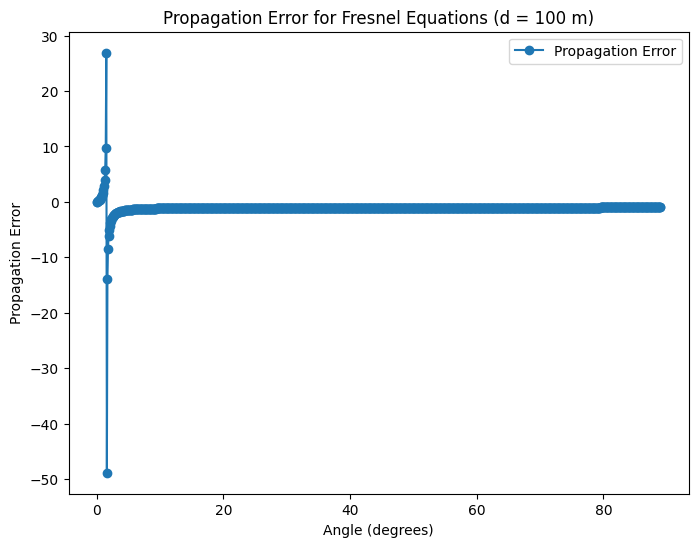

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi, c, epsilon_0

def fresnel_zone(theta):
    '''Return the Fresnel zone (n = 1, 2, ...) in which theta falls.'''
    return np.sqrt(theta**2 / (pi/2)**2)

def fresnel_reflection_coefficient(theta, d):
    '''Return the reflection coefficient (r) for Fresnel propagation.'''
    # Fresnel zone
    n = fresnel_zone(theta)
    
    # Wavelength and speed of light
    lambda_ = c / (1 / (epsilon_0 * c) + 1j * d / (4 * pi))
    
    # Propagation distance for the first half of the wave
    D = n * lambda_ / 2
    
    # Reflection coefficient (r)
    r = 2 * D / lambda_
    
    return r

# Propagation distance (m)
d = 100

# Angle range (degrees)
theta_range = np.linspace(0, 89, 1000)

# Reflection coefficients
r_values = fresnel_reflection_coefficient(theta_range, d)

# Propagation error
propagation_error = np.abs(r_values) / (1 - np.abs(r_values))

# Plot the propagation error as a function of angle
plt.figure(figsize=(8, 6))
plt.plot(theta_range, propagation_error, marker='o', label='Propagation Error')
plt.xlabel('Angle (degrees)')
plt.ylabel('Propagation Error')
plt.legend()
plt.title(f'Propagation Error for Fresnel Equations (d = {d} m)')
plt.show()